# Healthcare Patient Risk Analysis
## Comprehensive Analysis of Patient Data

This notebook performs:
- **Task 1**: Exploratory Data Analysis (EDA)
- **Task 2**: Supervised Learning for Test Result Prediction
- **Task 3**: Unsupervised Learning for Anomaly Detection in Billing
- **Task 4**: AI-Based Doctor Recommendation Generator

---


## Step 0: Import Required Libraries

In [26]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# For machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.ensemble import IsolationForest

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("✓ All libraries imported successfully!")

✓ All libraries imported successfully!


## Step 1: Load and Inspect the Dataset

In [27]:
# Load the dataset
df = pd.read_csv('healthcare_dataset.csv')

# Display basic information
print("Dataset Shape:", df.shape)
print("\n" + "="*80)
print("First 5 Rows:")
print("="*80)
df.head()

Dataset Shape: (55500, 15)

First 5 Rows:


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [28]:
# Dataset Info
print("Dataset Information:")
print("="*80)
df.info()
print("\n" + "="*80)
print("Column Names:")
print("="*80)
print(df.columns.tolist())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(

In [29]:
# Check for missing values
print("Missing Values:")
print("="*80)
missing = df.isnull().sum()
print(missing[missing > 0] if missing.sum() > 0 else "No missing values found!")

print("\n" + "="*80)
print("Statistical Summary:")
print("="*80)
df.describe()

Missing Values:
No missing values found!

Statistical Summary:


,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


In [30]:
# Check unique values in categorical columns
print("Unique Values in Key Columns:")
print("="*80)
categorical_cols = ['Gender', 'Blood Type', 'Medical Condition', 'Admission Type', 
                    'Medication', 'Test Results', 'Insurance Provider']

for col in categorical_cols:
    print(f"\n{col}: {df[col].nunique()} unique values")
    print(f"Values: {df[col].unique()}")

Unique Values in Key Columns:

Gender: 2 unique values
Values: ['Male' 'Female']

Blood Type: 8 unique values
Values: ['B-' 'A+' 'A-' 'O+' 'AB+' 'AB-' 'B+' 'O-']

Medical Condition: 6 unique values
Values: ['Cancer' 'Obesity' 'Diabetes' 'Asthma' 'Hypertension' 'Arthritis']

Admission Type: 3 unique values
Values: ['Urgent' 'Emergency' 'Elective']

Medication: 5 unique values
Values: ['Paracetamol' 'Ibuprofen' 'Aspirin' 'Penicillin' 'Lipitor']

Test Results: 3 unique values
Values: ['Normal' 'Inconclusive' 'Abnormal']

Insurance Provider: 5 unique values
Values: ['Blue Cross' 'Medicare' 'Aetna' 'UnitedHealthcare' 'Cigna']


---
# TASK 1: EXPLORATORY DATA ANALYSIS (EDA)

## 1.1 Distribution Analysis: Age, Billing Amount, and Room Number

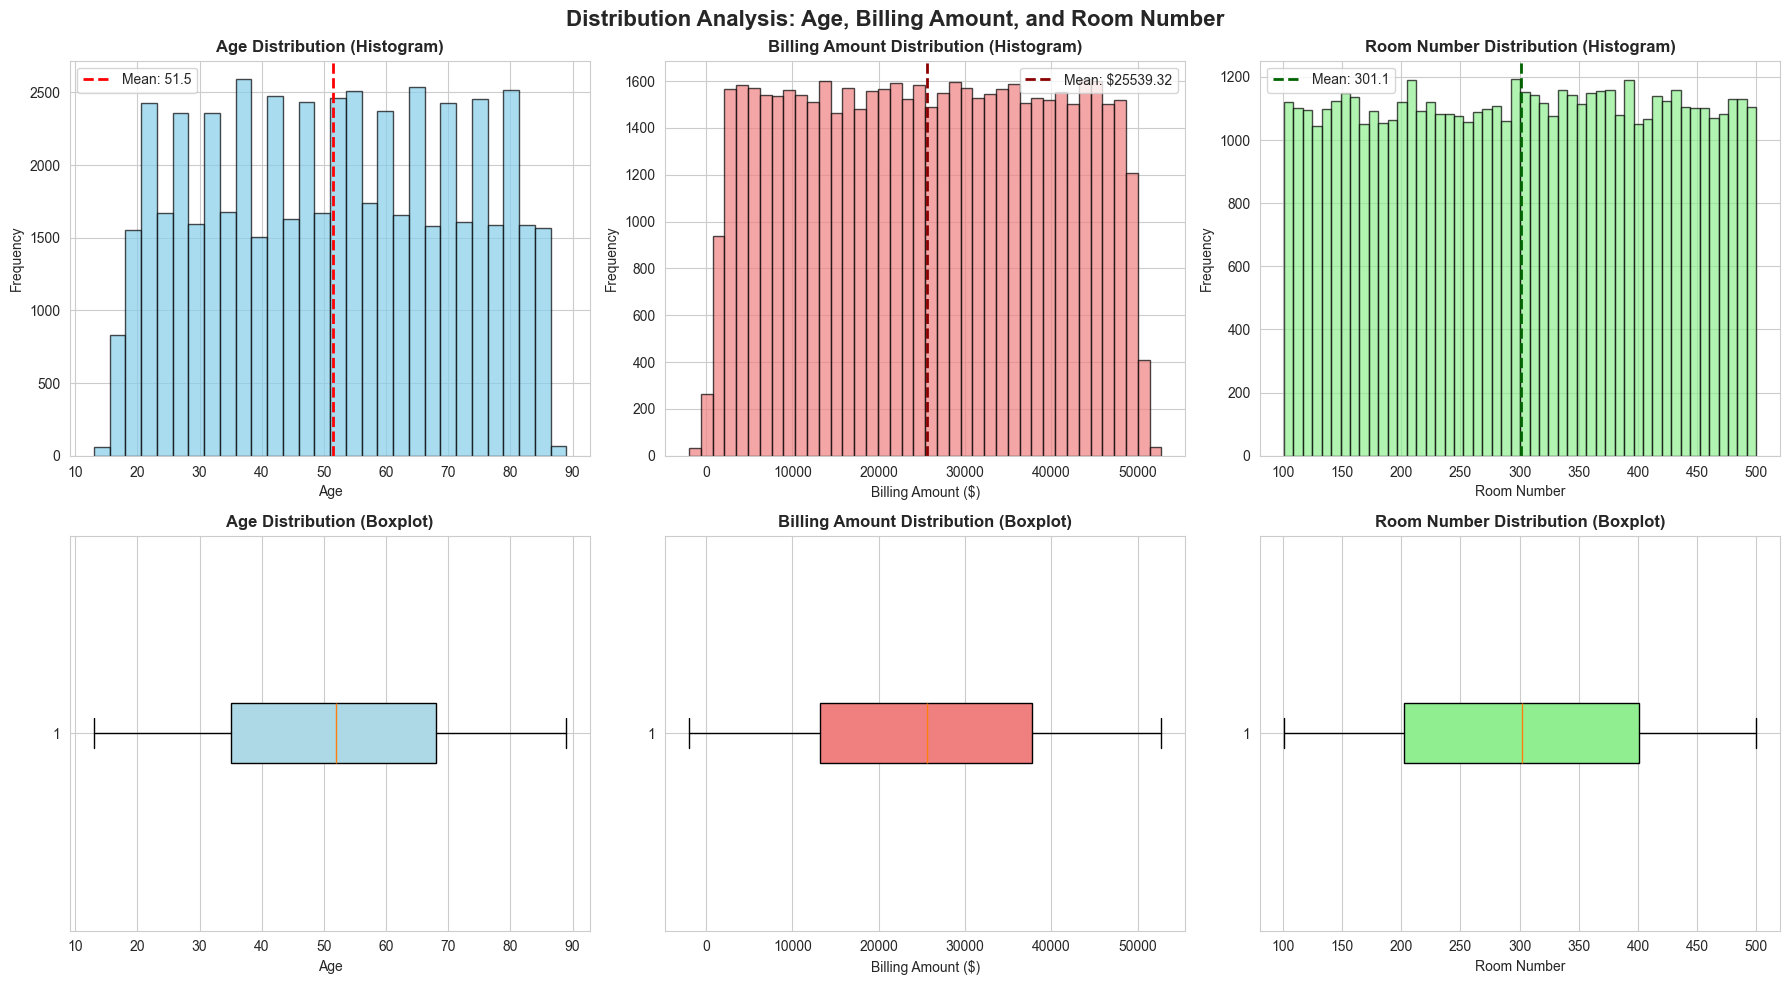


DISTRIBUTION STATISTICS

Age:
  Mean: 51.54
  Median: 52.00
  Std Dev: 19.60
  Min: 13.00
  Max: 89.00

Billing Amount:
  Mean: 25539.32
  Median: 25538.07
  Std Dev: 14211.45
  Min: -2008.49
  Max: 52764.28

Room Number:
  Mean: 301.13
  Median: 302.00
  Std Dev: 115.24
  Min: 101.00
  Max: 500.00


In [31]:
# Distribution of Age, Billing Amount, and Room Number
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Distribution Analysis: Age, Billing Amount, and Room Number', fontsize=16, fontweight='bold')

# Age Distribution
axes[0, 0].hist(df['Age'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Age Distribution (Histogram)', fontweight='bold')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].axvline(df['Age'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["Age"].mean():.1f}')
axes[0, 0].legend()

axes[1, 0].boxplot(df['Age'], vert=False, patch_artist=True, 
                    boxprops=dict(facecolor='lightblue'))
axes[1, 0].set_title('Age Distribution (Boxplot)', fontweight='bold')
axes[1, 0].set_xlabel('Age')

# Billing Amount Distribution
axes[0, 1].hist(df['Billing Amount'], bins=40, color='lightcoral', edgecolor='black', alpha=0.7)
axes[0, 1].set_title('Billing Amount Distribution (Histogram)', fontweight='bold')
axes[0, 1].set_xlabel('Billing Amount ($)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].axvline(df['Billing Amount'].mean(), color='darkred', linestyle='--', linewidth=2, 
                    label=f'Mean: ${df["Billing Amount"].mean():.2f}')
axes[0, 1].legend()

axes[1, 1].boxplot(df['Billing Amount'], vert=False, patch_artist=True, 
                    boxprops=dict(facecolor='lightcoral'))
axes[1, 1].set_title('Billing Amount Distribution (Boxplot)', fontweight='bold')
axes[1, 1].set_xlabel('Billing Amount ($)')

# Room Number Distribution
axes[0, 2].hist(df['Room Number'], bins=50, color='lightgreen', edgecolor='black', alpha=0.7)
axes[0, 2].set_title('Room Number Distribution (Histogram)', fontweight='bold')
axes[0, 2].set_xlabel('Room Number')
axes[0, 2].set_ylabel('Frequency')
axes[0, 2].axvline(df['Room Number'].mean(), color='darkgreen', linestyle='--', linewidth=2, 
                    label=f'Mean: {df["Room Number"].mean():.1f}')
axes[0, 2].legend()

axes[1, 2].boxplot(df['Room Number'], vert=False, patch_artist=True, 
                    boxprops=dict(facecolor='lightgreen'))
axes[1, 2].set_title('Room Number Distribution (Boxplot)', fontweight='bold')
axes[1, 2].set_xlabel('Room Number')

plt.tight_layout()
plt.show()

# Print statistics
print("\n" + "="*80)
print("DISTRIBUTION STATISTICS")
print("="*80)
for col in ['Age', 'Billing Amount', 'Room Number']:
    print(f"\n{col}:")
    print(f"  Mean: {df[col].mean():.2f}")
    print(f"  Median: {df[col].median():.2f}")
    print(f"  Std Dev: {df[col].std():.2f}")
    print(f"  Min: {df[col].min():.2f}")
    print(f"  Max: {df[col].max():.2f}")

## 1.2 Frequency Analysis: Medical Condition, Admission Type, and Medication

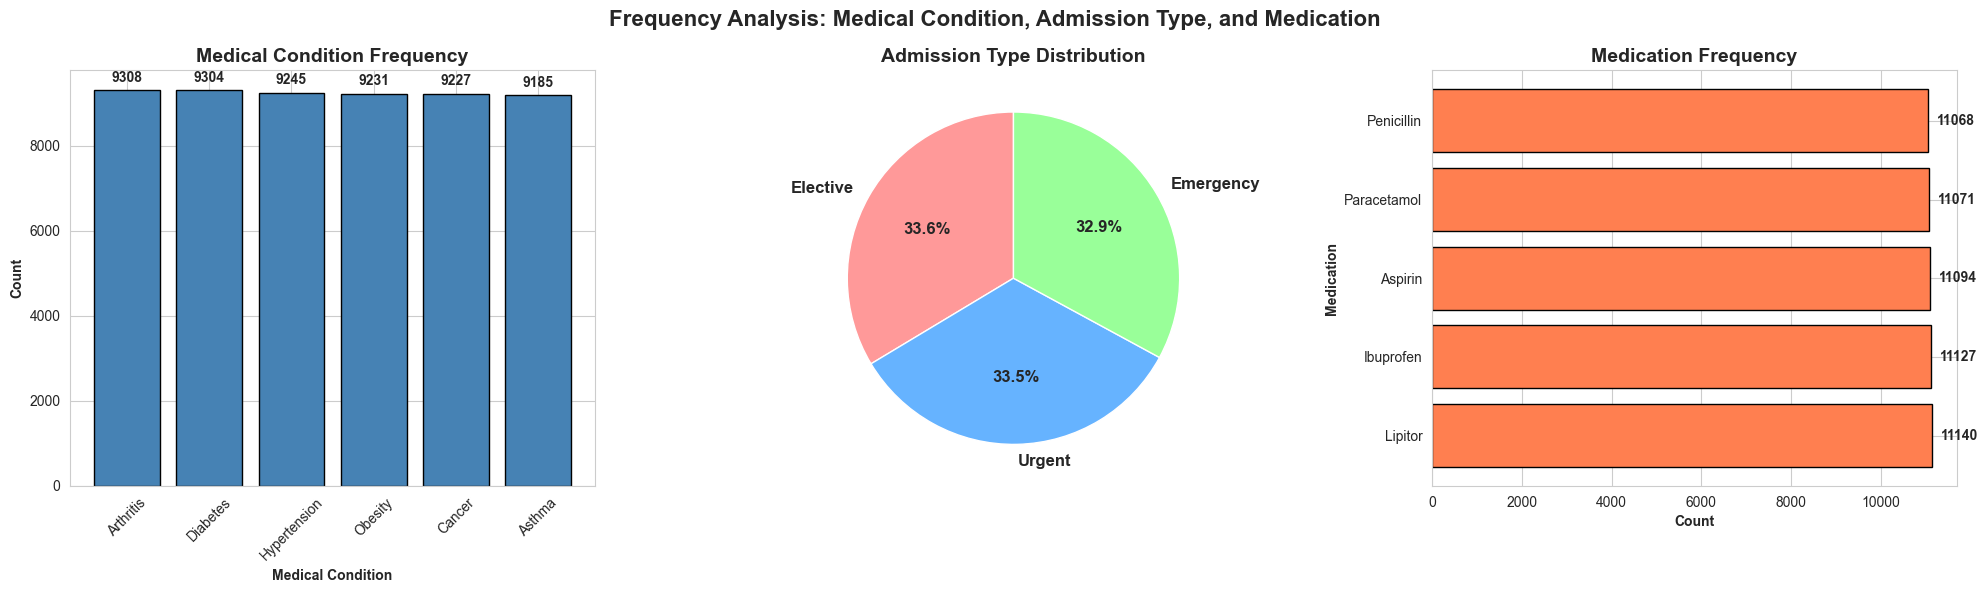


FREQUENCY TABLES

1. Medical Condition:
----------------------------------------
   Arthritis           :   9308 (16.77%)
   Diabetes            :   9304 (16.76%)
   Hypertension        :   9245 (16.66%)
   Obesity             :   9231 (16.63%)
   Cancer              :   9227 (16.63%)
   Asthma              :   9185 (16.55%)

2. Admission Type:
----------------------------------------
   Elective            :  18655 (33.61%)
   Urgent              :  18576 (33.47%)
   Emergency           :  18269 (32.92%)

3. Medication:
----------------------------------------
   Lipitor             :  11140 (20.07%)
   Ibuprofen           :  11127 (20.05%)
   Aspirin             :  11094 (19.99%)
   Paracetamol         :  11071 (19.95%)
   Penicillin          :  11068 (19.94%)


In [32]:
# Frequency analysis for Medical Condition, Admission Type, and Medication
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Frequency Analysis: Medical Condition, Admission Type, and Medication', 
             fontsize=16, fontweight='bold')

# Medical Condition
med_condition_counts = df['Medical Condition'].value_counts()
axes[0].bar(med_condition_counts.index, med_condition_counts.values, color='steelblue', edgecolor='black')
axes[0].set_title('Medical Condition Frequency', fontweight='bold', fontsize=14)
axes[0].set_xlabel('Medical Condition', fontweight='bold')
axes[0].set_ylabel('Count', fontweight='bold')
axes[0].tick_params(axis='x', rotation=45)
for i, v in enumerate(med_condition_counts.values):
    axes[0].text(i, v + 200, str(v), ha='center', fontweight='bold')

# Admission Type
admission_counts = df['Admission Type'].value_counts()
colors = ['#ff9999', '#66b3ff', '#99ff99']
axes[1].pie(admission_counts.values, labels=admission_counts.index, autopct='%1.1f%%', 
            startangle=90, colors=colors, textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[1].set_title('Admission Type Distribution', fontweight='bold', fontsize=14)

# Medication
medication_counts = df['Medication'].value_counts()
axes[2].barh(medication_counts.index, medication_counts.values, color='coral', edgecolor='black')
axes[2].set_title('Medication Frequency', fontweight='bold', fontsize=14)
axes[2].set_xlabel('Count', fontweight='bold')
axes[2].set_ylabel('Medication', fontweight='bold')
for i, v in enumerate(medication_counts.values):
    axes[2].text(v + 200, i, str(v), va='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Print frequency tables
print("\n" + "="*80)
print("FREQUENCY TABLES")
print("="*80)

print("\n1. Medical Condition:")
print("-" * 40)
for condition, count in med_condition_counts.items():
    print(f"   {condition:20s}: {count:6d} ({count/len(df)*100:.2f}%)")

print("\n2. Admission Type:")
print("-" * 40)
for admission, count in admission_counts.items():
    print(f"   {admission:20s}: {count:6d} ({count/len(df)*100:.2f}%)")

print("\n3. Medication:")
print("-" * 40)
for med, count in medication_counts.items():
    print(f"   {med:20s}: {count:6d} ({count/len(df)*100:.2f}%)")

## 1.3 Additional EDA Insights

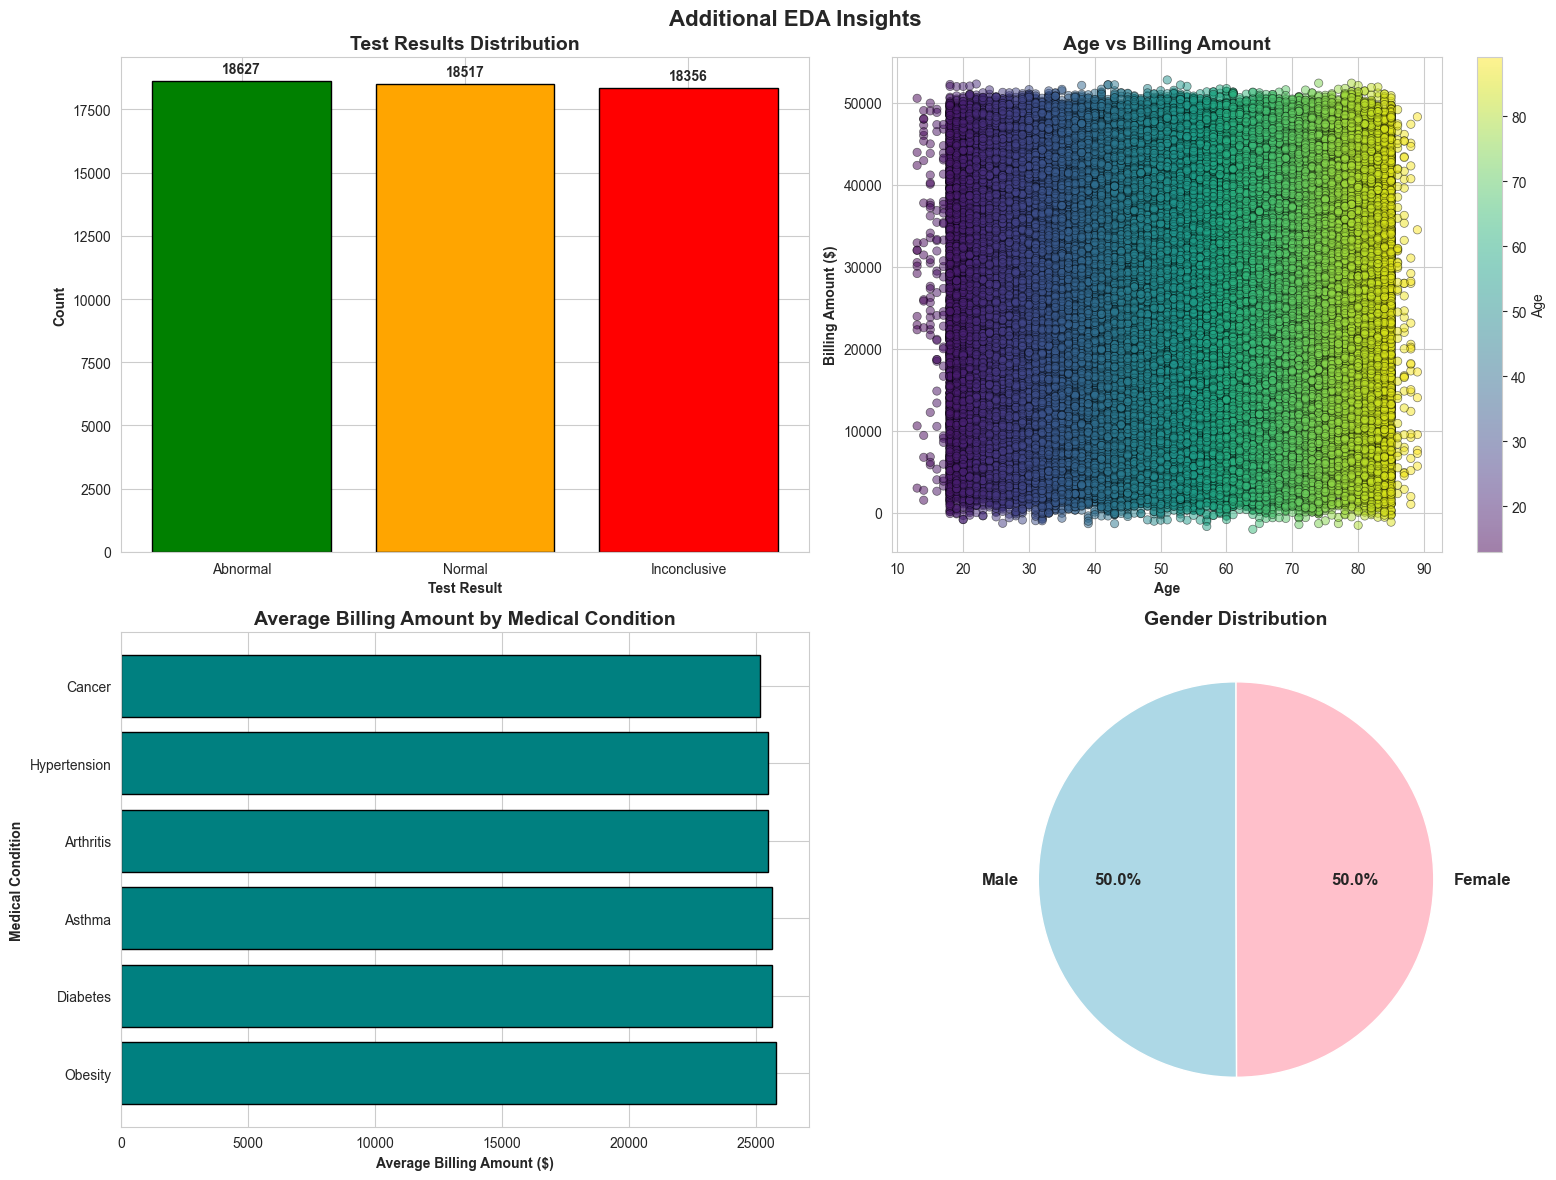


TEST RESULTS DISTRIBUTION
Abnormal       :  18627 (33.56%)
Normal         :  18517 (33.36%)
Inconclusive   :  18356 (33.07%)


In [33]:
# Additional insights: Test Results distribution and relationship with other variables
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Additional EDA Insights', fontsize=16, fontweight='bold')

# Test Results distribution
test_results_counts = df['Test Results'].value_counts()
axes[0, 0].bar(test_results_counts.index, test_results_counts.values, 
               color=['green', 'orange', 'red'], edgecolor='black')
axes[0, 0].set_title('Test Results Distribution', fontweight='bold', fontsize=14)
axes[0, 0].set_xlabel('Test Result', fontweight='bold')
axes[0, 0].set_ylabel('Count', fontweight='bold')
for i, v in enumerate(test_results_counts.values):
    axes[0, 0].text(i, v + 300, str(v), ha='center', fontweight='bold')

# Age vs Billing Amount
scatter = axes[0, 1].scatter(df['Age'], df['Billing Amount'], c=df['Age'], 
                             cmap='viridis', alpha=0.5, edgecolors='black', linewidth=0.5)
axes[0, 1].set_title('Age vs Billing Amount', fontweight='bold', fontsize=14)
axes[0, 1].set_xlabel('Age', fontweight='bold')
axes[0, 1].set_ylabel('Billing Amount ($)', fontweight='bold')
plt.colorbar(scatter, ax=axes[0, 1], label='Age')

# Medical Condition vs Average Billing
med_billing = df.groupby('Medical Condition')['Billing Amount'].mean().sort_values(ascending=False)
axes[1, 0].barh(med_billing.index, med_billing.values, color='teal', edgecolor='black')
axes[1, 0].set_title('Average Billing Amount by Medical Condition', fontweight='bold', fontsize=14)
axes[1, 0].set_xlabel('Average Billing Amount ($)', fontweight='bold')
axes[1, 0].set_ylabel('Medical Condition', fontweight='bold')

# Gender distribution
gender_counts = df['Gender'].value_counts()
axes[1, 1].pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', 
               startangle=90, colors=['lightblue', 'pink'], 
               textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[1, 1].set_title('Gender Distribution', fontweight='bold', fontsize=14)

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("TEST RESULTS DISTRIBUTION")
print("="*80)
for result, count in test_results_counts.items():
    print(f"{result:15s}: {count:6d} ({count/len(df)*100:.2f}%)")

---
# TASK 2: SUPERVISED LEARNING - Test Results Prediction

## 2.1 Data Preparation and Feature Engineering

In [34]:
# Create a copy for modeling
df_model = df.copy()

# Feature Engineering: Extract date features
df_model['Date of Admission'] = pd.to_datetime(df_model['Date of Admission'])
df_model['Discharge Date'] = pd.to_datetime(df_model['Discharge Date'])
df_model['Length_of_Stay'] = (df_model['Discharge Date'] - df_model['Date of Admission']).dt.days
df_model['Admission_Month'] = df_model['Date of Admission'].dt.month
df_model['Admission_Year'] = df_model['Date of Admission'].dt.year

# Select features for prediction
feature_columns = ['Age', 'Gender', 'Blood Type', 'Medical Condition', 
                   'Admission Type', 'Medication', 'Billing Amount', 
                   'Room Number', 'Insurance Provider', 'Length_of_Stay', 
                   'Admission_Month']

# Target variable
target = 'Test Results'

print("="*80)
print("FEATURE ENGINEERING SUMMARY")
print("="*80)
print(f"\nTarget Variable: {target}")
print(f"Number of Features: {len(feature_columns)}")
print(f"\nFeatures used for prediction:")
for i, feat in enumerate(feature_columns, 1):
    print(f"  {i}. {feat}")

print(f"\nDataset shape after feature engineering: {df_model.shape}")
print(f"\nNew features created:")
print(f"  - Length_of_Stay: {df_model['Length_of_Stay'].describe()['mean']:.2f} days (avg)")
print(f"  - Admission_Month: Range {df_model['Admission_Month'].min()} to {df_model['Admission_Month'].max()}")

# Check target variable distribution
print(f"\nTarget Variable Distribution:")
print(df_model[target].value_counts())
df_model[['Length_of_Stay', 'Admission_Month']].head(10)

FEATURE ENGINEERING SUMMARY

Target Variable: Test Results
Number of Features: 11

Features used for prediction:
  1. Age
  2. Gender
  3. Blood Type
  4. Medical Condition
  5. Admission Type
  6. Medication
  7. Billing Amount
  8. Room Number
  9. Insurance Provider
  10. Length_of_Stay
  11. Admission_Month

Dataset shape after feature engineering: (55500, 18)

New features created:
  - Length_of_Stay: 15.51 days (avg)
  - Admission_Month: Range 1 to 12

Target Variable Distribution:
Test Results
Abnormal        18627
Normal          18517
Inconclusive    18356
Name: count, dtype: int64


,Length_of_Stay,Admission_Month
0,2,1
1,6,8
2,15,9
3,30,11
4,20,9
5,4,12
6,12,11
7,10,12
8,13,7
9,30,5


## 2.2 Encode Categorical Variables and Prepare Features

In [35]:
# Encode categorical variables
df_encoded = df_model[feature_columns + [target]].copy()

# Handle missing values before encoding
print("="*80)
print("HANDLING MISSING VALUES")
print("="*80)
print(f"\nMissing values before cleaning:")
missing_before = df_encoded.isnull().sum()
print(missing_before[missing_before > 0])

# Drop rows with any missing values
df_encoded = df_encoded.dropna()
print(f"\nDataset shape after removing missing values: {df_encoded.shape}")

# Label encode categorical columns
label_encoders = {}
categorical_cols = ['Gender', 'Blood Type', 'Medical Condition', 'Admission Type', 
                    'Medication', 'Insurance Provider']

print("\n" + "="*80)
print("ENCODING CATEGORICAL VARIABLES")
print("="*80)

for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le
    print(f"✓ {col}: {len(le.classes_)} categories encoded")

# Encode target variable
target_encoder = LabelEncoder()
df_encoded[target] = target_encoder.fit_transform(df_encoded[target])

print(f"\n✓ Target Variable '{target}' encoded:")
for i, label in enumerate(target_encoder.classes_):
    print(f"    {label} → {i}")

print("\n" + "="*80)
print("ENCODED DATASET PREVIEW")
print("="*80)
df_encoded.head()

# --- Task 2 continues with train-test split, model training, etc. ---

HANDLING MISSING VALUES

Missing values before cleaning:
Series([], dtype: int64)

Dataset shape after removing missing values: (55500, 12)

ENCODING CATEGORICAL VARIABLES
✓ Gender: 2 categories encoded
✓ Blood Type: 8 categories encoded
✓ Medical Condition: 6 categories encoded
✓ Admission Type: 3 categories encoded
✓ Medication: 5 categories encoded
✓ Insurance Provider: 5 categories encoded

✓ Target Variable 'Test Results' encoded:
    Abnormal → 0
    Inconclusive → 1
    Normal → 2

ENCODED DATASET PREVIEW


,Age,Gender,Blood Type,Medical Condition,Admission Type,Medication,Billing Amount,Room Number,Insurance Provider,Length_of_Stay,Admission_Month,Test Results
0,30,1,5,2,2,3,18856.281306,328,1,2,1,2
1,62,1,0,5,1,1,33643.327287,265,3,6,8,1
2,76,0,1,5,1,0,27955.096079,205,0,15,9,2
3,28,0,6,3,0,1,37909.782410,450,3,30,11,0
4,43,0,2,2,2,4,14238.317814,458,0,20,9,0


## 2.3 Split Dataset into Training and Testing Sets

In [36]:
# Prepare features and target
X = df_encoded[feature_columns]
y = df_encoded[target]

# Split the dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("="*80)
print("TRAIN-TEST SPLIT SUMMARY")
print("="*80)
print(f"\nTotal Samples: {len(X)}")
print(f"Training Samples: {len(X_train)} ({len(X_train)/len(X)*100:.1f}%)")
print(f"Testing Samples: {len(X_test)} ({len(X_test)/len(X)*100:.1f}%)")

print(f"\n{'Class Distribution:'}")
print("-"*80)
print("Training Set:")
train_dist = pd.Series(y_train).value_counts().sort_index()
for idx, count in train_dist.items():
    label = target_encoder.inverse_transform([idx])[0]
    print(f"  {label:15s}: {count:5d} ({count/len(y_train)*100:.1f}%)")

print("\nTesting Set:")
test_dist = pd.Series(y_test).value_counts().sort_index()
for idx, count in test_dist.items():
    label = target_encoder.inverse_transform([idx])[0]
    print(f"  {label:15s}: {count:5d} ({count/len(y_test)*100:.1f}%)")

print("\n" + "="*80)
print(f"Feature Matrix Shape: {X_train.shape}")
print(f"Number of Features: {X_train.shape[1]}")
print("="*80)

# --- Task 2 continues with model training, evaluation, etc. ---

TRAIN-TEST SPLIT SUMMARY

Total Samples: 55500
Training Samples: 44400 (80.0%)
Testing Samples: 11100 (20.0%)

Class Distribution:
--------------------------------------------------------------------------------
Training Set:
  Abnormal       : 14901 (33.6%)
  Inconclusive   : 14685 (33.1%)
  Normal         : 14814 (33.4%)

Testing Set:
  Abnormal       :  3726 (33.6%)
  Inconclusive   :  3671 (33.1%)
  Normal         :  3703 (33.4%)

Feature Matrix Shape: (44400, 11)
Number of Features: 11


## 2.4 Train Prediction Models and Evaluate Performance

In [37]:
# Train multiple models and compare performance
print("="*80)
print("TRAINING PREDICTION MODELS")
print("="*80)

# Dictionary to store models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, max_depth=15),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42, max_depth=5)
}

results = []

for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'F1-Score': f1
    })
    
    print(f"✓ {model_name} trained successfully!")
    print(f"  Accuracy: {accuracy*100:.2f}%")
    print(f"  F1-Score: {f1:.4f}")

# Create results dataframe
results_df = pd.DataFrame(results).sort_values('Accuracy', ascending=False)

print("\n" + "="*80)
print("MODEL PERFORMANCE COMPARISON")
print("="*80)
print(results_df.to_string(index=False))

# Select best model
best_model_name = results_df.iloc[0]['Model']
best_accuracy = results_df.iloc[0]['Accuracy']

print(f"\n{'='*80}")
print(f"BEST MODEL: {best_model_name}")
print(f"ACCURACY: {best_accuracy*100:.2f}%")
print(f"{'='*80}")

# Use the best model for predictions
best_model = models[best_model_name]
best_predictions = best_model.predict(X_test)

# --- Task 2 continues with evaluation, feature importance, etc. ---

TRAINING PREDICTION MODELS

Training Random Forest...
✓ Random Forest trained successfully!
  Accuracy: 42.72%
  F1-Score: 0.4269

Training Gradient Boosting...
✓ Gradient Boosting trained successfully!
  Accuracy: 35.03%
  F1-Score: 0.3495

MODEL PERFORMANCE COMPARISON
            Model  Accuracy  F1-Score
    Random Forest  0.427207  0.426876
Gradient Boosting  0.350270  0.349470

BEST MODEL: Random Forest
ACCURACY: 42.72%


## 2.5 Detailed Performance Metrics and Confusion Matrix

CLASSIFICATION REPORT - Random Forest
              precision    recall  f1-score   support

    Abnormal     0.4252    0.4611    0.4424      3726
Inconclusive     0.4297    0.4113    0.4203      3671
      Normal     0.4270    0.4089    0.4177      3703

    accuracy                         0.4272     11100
   macro avg     0.4273    0.4271    0.4268     11100
weighted avg     0.4273    0.4272    0.4269     11100



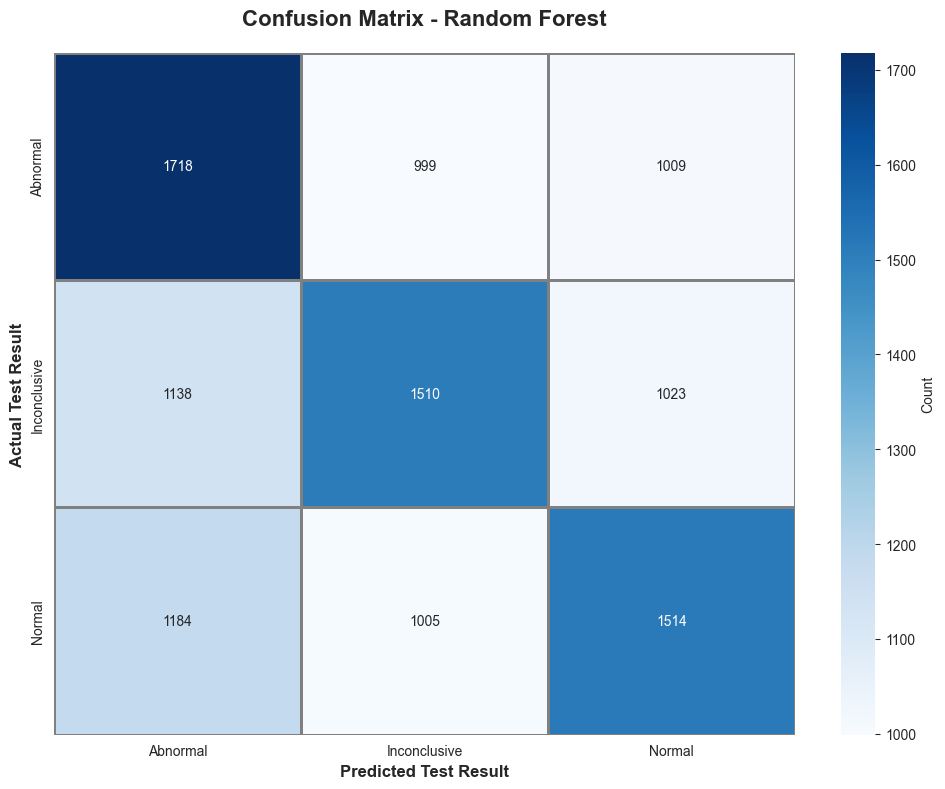


PER-CLASS ACCURACY
Abnormal       : 1718/3726 = 46.11%
Inconclusive   : 1510/3671 = 41.13%
Normal         : 1514/3703 = 40.89%


In [38]:
# Detailed classification report
print("="*80)
print(f"CLASSIFICATION REPORT - {best_model_name}")
print("="*80)
print(classification_report(y_test, best_predictions, 
                          target_names=target_encoder.classes_,
                          digits=4))

# Confusion Matrix
cm = confusion_matrix(y_test, best_predictions)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=target_encoder.classes_,
            yticklabels=target_encoder.classes_,
            cbar_kws={'label': 'Count'},
            linewidths=1, linecolor='gray')
ax.set_title(f'Confusion Matrix - {best_model_name}', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Predicted Test Result', fontsize=12, fontweight='bold')
ax.set_ylabel('Actual Test Result', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

# Calculate accuracy per class
print("\n" + "="*80)
print("PER-CLASS ACCURACY")
print("="*80)
for i, label in enumerate(target_encoder.classes_):
    class_correct = cm[i, i]
    class_total = cm[i].sum()
    class_accuracy = class_correct / class_total * 100
    print(f"{label:15s}: {class_correct:4d}/{class_total:4d} = {class_accuracy:.2f}%")

# --- Task 2 continues with feature importance, predicted vs actual, etc. ---

## 2.6 Feature Importance Analysis

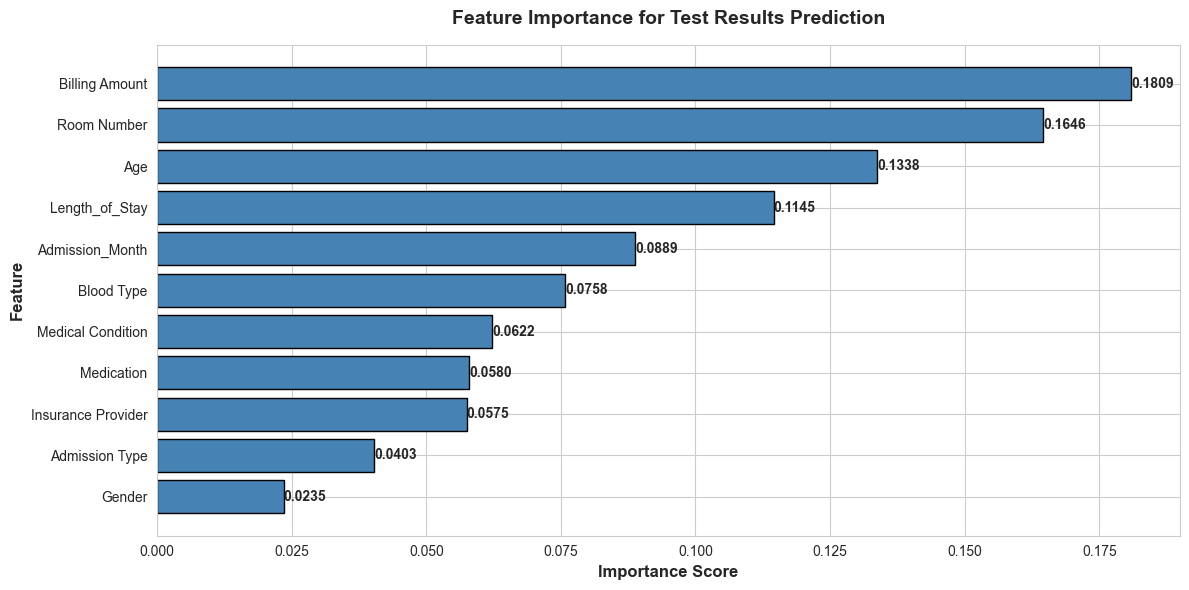

TOP 5 MOST IMPORTANT FEATURES
Billing Amount           : 0.1809
Room Number              : 0.1646
Age                      : 0.1338
Length_of_Stay           : 0.1145
Admission_Month          : 0.0889


In [39]:
# Feature importance analysis
feature_importance = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': best_model.feature_importances_
}).sort_values('Importance', ascending=False)

# Plot feature importance
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.barh(feature_importance['Feature'], feature_importance['Importance'], 
               color='steelblue', edgecolor='black')
ax.set_xlabel('Importance Score', fontsize=12, fontweight='bold')
ax.set_ylabel('Feature', fontsize=12, fontweight='bold')
ax.set_title('Feature Importance for Test Results Prediction', 
             fontsize=14, fontweight='bold', pad=15)
ax.invert_yaxis()

# Add value labels
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height()/2, 
            f'{width:.4f}', ha='left', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

print("="*80)
print("TOP 5 MOST IMPORTANT FEATURES")
print("="*80)
for idx, row in feature_importance.head(5).iterrows():
    print(f"{row['Feature']:25s}: {row['Importance']:.4f}")

# --- Task 2 continues with predicted vs actual, etc. ---

## 2.7 Predicted vs Actual Values for Test Data

In [40]:
# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Patient_Index': X_test.index,
    'Age': df_model.loc[X_test.index, 'Age'].values,
    'Medical_Condition': df_model.loc[X_test.index, 'Medical Condition'].values,
    'Billing_Amount': df_model.loc[X_test.index, 'Billing Amount'].values,
    'Actual_Result': target_encoder.inverse_transform(y_test),
    'Predicted_Result': target_encoder.inverse_transform(best_predictions),
    'Correct': target_encoder.inverse_transform(y_test) == target_encoder.inverse_transform(best_predictions)
})

print("="*80)
print("PREDICTED VS ACTUAL TEST RESULTS (First 30 samples)")
print("="*80)
print(comparison_df.head(30).to_string(index=False))

# Summary statistics
correct_predictions = comparison_df['Correct'].sum()
total_predictions = len(comparison_df)
accuracy_pct = correct_predictions / total_predictions * 100

print("\n" + "="*80)
print("PREDICTION SUMMARY")
print("="*80)
print(f"Total Test Samples: {total_predictions}")
print(f"Correct Predictions: {correct_predictions}")
print(f"Incorrect Predictions: {total_predictions - correct_predictions}")
print(f"Accuracy: {accuracy_pct:.2f}%")

# Breakdown by actual class
print("\n" + "="*80)
print("PREDICTION ACCURACY BY ACTUAL TEST RESULT")
print("="*80)
for result in target_encoder.classes_:
    subset = comparison_df[comparison_df['Actual_Result'] == result]
    correct = subset['Correct'].sum()
    total = len(subset)
    pct = correct / total * 100 if total > 0 else 0
    print(f"{result:15s}: {correct:3d}/{total:3d} = {pct:.2f}%")

# --- Task 2 continues with predicted vs actual visualization ---

PREDICTED VS ACTUAL TEST RESULTS (First 30 samples)
 Patient_Index  Age Medical_Condition  Billing_Amount Actual_Result Predicted_Result  Correct
         55390   72            Asthma    11124.838926  Inconclusive     Inconclusive     True
         39921   64           Obesity    16589.579167        Normal         Abnormal    False
         19608   58          Diabetes     1585.589236  Inconclusive           Normal    False
         54786   78          Diabetes    25762.710120        Normal           Normal     True
         39082   38         Arthritis    30346.095785  Inconclusive         Abnormal    False
         26325   62      Hypertension    18515.239599  Inconclusive     Inconclusive     True
         41543   41            Cancer    19942.394918      Abnormal     Inconclusive    False
         19687   46      Hypertension    50728.806883      Abnormal     Inconclusive    False
         31742   62          Diabetes    34186.040512  Inconclusive           Normal    False
        

## 2.8 Visualization: Predicted vs Actual Distribution

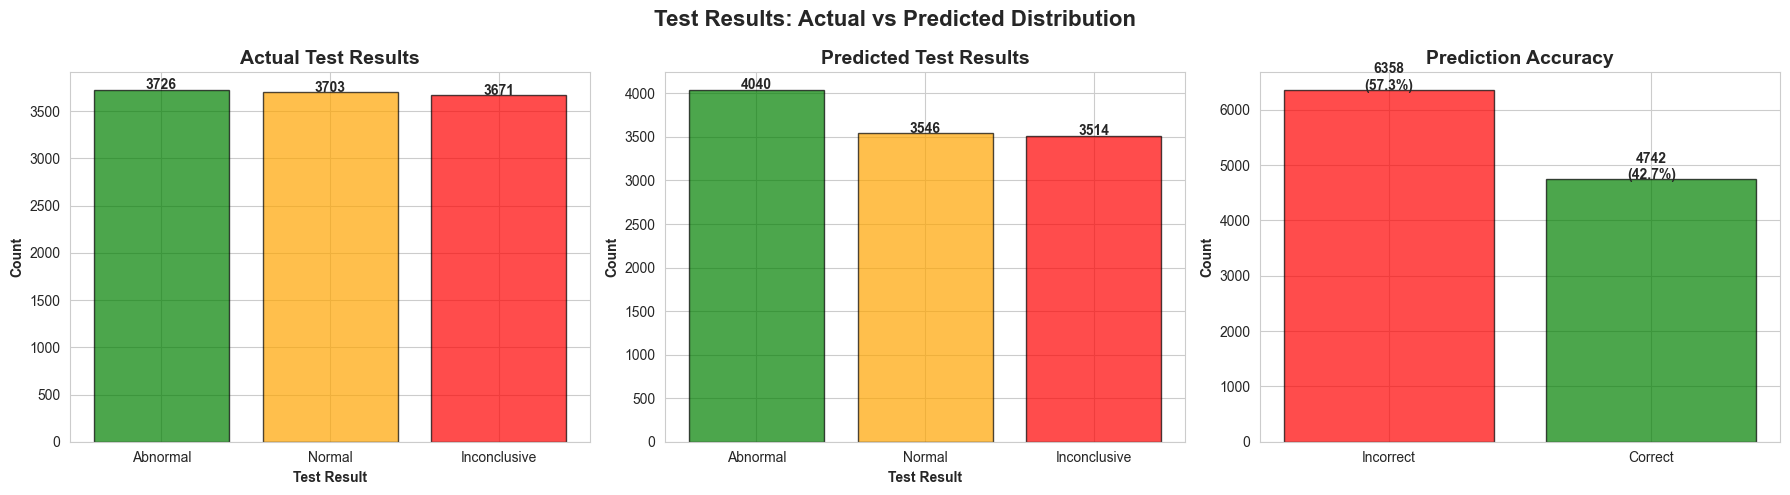

In [41]:
# Visualize predicted vs actual distribution
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Test Results: Actual vs Predicted Distribution', fontsize=16, fontweight='bold')

# Actual distribution
actual_counts = comparison_df['Actual_Result'].value_counts()
axes[0].bar(actual_counts.index, actual_counts.values, 
           color=['green', 'orange', 'red'], edgecolor='black', alpha=0.7)
axes[0].set_title('Actual Test Results', fontweight='bold', fontsize=14)
axes[0].set_xlabel('Test Result', fontweight='bold')
axes[0].set_ylabel('Count', fontweight='bold')
for i, v in enumerate(actual_counts.values):
    axes[0].text(i, v + 5, str(v), ha='center', fontweight='bold')

# Predicted distribution
predicted_counts = comparison_df['Predicted_Result'].value_counts()
axes[1].bar(predicted_counts.index, predicted_counts.values, 
           color=['green', 'orange', 'red'], edgecolor='black', alpha=0.7)
axes[1].set_title('Predicted Test Results', fontweight='bold', fontsize=14)
axes[1].set_xlabel('Test Result', fontweight='bold')
axes[1].set_ylabel('Count', fontweight='bold')
for i, v in enumerate(predicted_counts.values):
    axes[1].text(i, v + 5, str(v), ha='center', fontweight='bold')

# Correct vs Incorrect
correct_counts = comparison_df['Correct'].value_counts()
colors_correct = ['red', 'green']
axes[2].bar(['Incorrect', 'Correct'], 
           [correct_counts.get(False, 0), correct_counts.get(True, 0)],
           color=colors_correct, edgecolor='black', alpha=0.7)
axes[2].set_title('Prediction Accuracy', fontweight='bold', fontsize=14)
axes[2].set_ylabel('Count', fontweight='bold')
for i, (label, val) in enumerate([('Incorrect', correct_counts.get(False, 0)), 
                                   ('Correct', correct_counts.get(True, 0))]):
    axes[2].text(i, val + 5, f'{val}\n({val/total_predictions*100:.1f}%)', 
                ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

# --- End of Task 2: Supervised Learning ---

---
# TASK 3: UNSUPERVISED LEARNING - Anomaly Detection in Billing Amounts

## 3.1 Prepare Data for Anomaly Detection

In [42]:
# Prepare data for anomaly detection
df_anomaly = df_model.copy()

# Select features for anomaly detection
anomaly_features = ['Billing Amount', 'Age', 'Length_of_Stay']

# Create feature matrix
X_anomaly = df_anomaly[anomaly_features].copy()

# Handle any missing values
X_anomaly = X_anomaly.dropna()
df_anomaly_clean = df_anomaly.loc[X_anomaly.index].copy()

print("="*80)
print("ANOMALY DETECTION DATA PREPARATION")
print("="*80)
print(f"\nTotal Samples: {len(X_anomaly)}")
print(f"\nFeatures used for anomaly detection:")
for i, feat in enumerate(anomaly_features, 1):
    print(f"  {i}. {feat}")

print(f"\n{'Statistical Summary of Features:'}")
print("-"*80)
print(X_anomaly.describe())

# Standardize features for anomaly detection
scaler = StandardScaler()
X_anomaly_scaled = scaler.fit_transform(X_anomaly)

print("\n✓ Features standardized successfully!")
print(f"Scaled data shape: {X_anomaly_scaled.shape}")

# --- Task 3 continues with Isolation Forest, analysis, etc. ---

ANOMALY DETECTION DATA PREPARATION

Total Samples: 55500

Features used for anomaly detection:
  1. Billing Amount
  2. Age
  3. Length_of_Stay

Statistical Summary of Features:
--------------------------------------------------------------------------------
       Billing Amount           Age  Length_of_Stay
count    55500.000000  55500.000000    55500.000000
mean     25539.316097     51.539459       15.509009
std      14211.454431     19.602454        8.659600
min      -2008.492140     13.000000        1.000000
25%      13241.224652     35.000000        8.000000
50%      25538.069376     52.000000       15.000000
75%      37820.508436     68.000000       23.000000
max      52764.276736     89.000000       30.000000

✓ Features standardized successfully!
Scaled data shape: (55500, 3)


## 3.2 Apply Isolation Forest for Anomaly Detection

In [43]:
# Apply Isolation Forest for anomaly detection
print("="*80)
print("APPLYING ISOLATION FOREST ALGORITHM")
print("="*80)

# Initialize Isolation Forest
# contamination=0.05 means we expect about 5% of data to be anomalies
iso_forest = IsolationForest(
    contamination=0.05,
    random_state=42,
    n_estimators=100
)

# Fit and predict
print("\nTraining Isolation Forest model...")
anomaly_predictions = iso_forest.fit_predict(X_anomaly_scaled)

# Get anomaly scores (lower scores = more anomalous)
anomaly_scores = iso_forest.score_samples(X_anomaly_scaled)

# Add predictions to dataframe
df_anomaly_clean['Anomaly_Score'] = anomaly_scores
df_anomaly_clean['Is_Anomaly'] = anomaly_predictions == -1

# Count anomalies
n_anomalies = (anomaly_predictions == -1).sum()
n_normal = (anomaly_predictions == 1).sum()

print(f"✓ Isolation Forest training completed!")
print(f"\n{'Detection Results:'}")
print("-"*80)
print(f"Total Samples: {len(anomaly_predictions)}")
print(f"Normal Cases: {n_normal} ({n_normal/len(anomaly_predictions)*100:.2f}%)")
print(f"Anomalies Detected: {n_anomalies} ({n_anomalies/len(anomaly_predictions)*100:.2f}%)")

print(f"\n{'Anomaly Score Range:'}")
print(f"  Minimum (Most Anomalous): {anomaly_scores.min():.4f}")
print(f"  Maximum (Most Normal): {anomaly_scores.max():.4f}")
print(f"  Mean: {anomaly_scores.mean():.4f}")

# --- Task 3 continues with anomaly analysis, visualization, etc. ---

APPLYING ISOLATION FOREST ALGORITHM

Training Isolation Forest model...
✓ Isolation Forest training completed!

Detection Results:
--------------------------------------------------------------------------------
Total Samples: 55500
Normal Cases: 52725 (95.00%)
Anomalies Detected: 2775 (5.00%)

Anomaly Score Range:
  Minimum (Most Anomalous): -0.6689
  Maximum (Most Normal): -0.4507
  Mean: -0.5171


## 3.3 Analyze Detected Anomalies

In [44]:
# Extract anomalies for detailed analysis
anomalies = df_anomaly_clean[df_anomaly_clean['Is_Anomaly'] == True].copy()
normal_cases = df_anomaly_clean[df_anomaly_clean['Is_Anomaly'] == False].copy()

print("="*80)
print("ANOMALY ANALYSIS - DETAILED COMPARISON")
print("="*80)

print(f"\n{'BILLING AMOUNT COMPARISON:'}")
print("-"*80)
print(f"Normal Cases:")
print(f"  Mean: ${normal_cases['Billing Amount'].mean():.2f}")
print(f"  Median: ${normal_cases['Billing Amount'].median():.2f}")
print(f"  Std Dev: ${normal_cases['Billing Amount'].std():.2f}")
print(f"  Range: ${normal_cases['Billing Amount'].min():.2f} - ${normal_cases['Billing Amount'].max():.2f}")

print(f"\nAnomalous Cases:")
print(f"  Mean: ${anomalies['Billing Amount'].mean():.2f}")
print(f"  Median: ${anomalies['Billing Amount'].median():.2f}")
print(f"  Std Dev: ${anomalies['Billing Amount'].std():.2f}")
print(f"  Range: ${anomalies['Billing Amount'].min():.2f} - ${anomalies['Billing Amount'].max():.2f}")

print(f"\n{'AGE COMPARISON:'}")
print("-"*80)
print(f"Normal Cases - Mean Age: {normal_cases['Age'].mean():.1f} years")
print(f"Anomalous Cases - Mean Age: {anomalies['Age'].mean():.1f} years")

print(f"\n{'LENGTH OF STAY COMPARISON:'}")
print("-"*80)
print(f"Normal Cases - Mean Stay: {normal_cases['Length_of_Stay'].mean():.1f} days")
print(f"Anomalous Cases - Mean Stay: {anomalies['Length_of_Stay'].mean():.1f} days")

# Medical condition distribution in anomalies
print(f"\n{'MEDICAL CONDITIONS IN ANOMALIES:'}")
print("-"*80)
anomaly_conditions = anomalies['Medical Condition'].value_counts()
for condition, count in anomaly_conditions.items():
    print(f"  {condition:20s}: {count:3d} ({count/len(anomalies)*100:.1f}%)")

# --- Task 3 continues with top anomalies, visualization, interpretation, etc. ---

ANOMALY ANALYSIS - DETAILED COMPARISON

BILLING AMOUNT COMPARISON:
--------------------------------------------------------------------------------
Normal Cases:
  Mean: $25371.99
  Median: $25293.87
  Std Dev: $13794.89
  Range: $-2008.49 - $52764.28

Anomalous Cases:
  Mean: $28718.58
  Median: $37712.08
  Std Dev: $20325.72
  Range: $-1316.62 - $52373.03

AGE COMPARISON:
--------------------------------------------------------------------------------
Normal Cases - Mean Age: 51.9 years
Anomalous Cases - Mean Age: 45.0 years

LENGTH OF STAY COMPARISON:
--------------------------------------------------------------------------------
Normal Cases - Mean Stay: 15.6 days
Anomalous Cases - Mean Stay: 13.6 days

MEDICAL CONDITIONS IN ANOMALIES:
--------------------------------------------------------------------------------
  Hypertension        : 519 (18.7%)
  Obesity             : 470 (16.9%)
  Cancer              : 464 (16.7%)
  Diabetes            : 447 (16.1%)
  Arthritis           : 

## 3.4 Display Top Anomalies for Review

In [45]:
# Display top anomalies sorted by anomaly score
top_anomalies = anomalies.nsmallest(20, 'Anomaly_Score')[
    ['Name', 'Age', 'Medical Condition', 'Billing Amount', 
     'Length_of_Stay', 'Admission Type', 'Anomaly_Score']
]

print("="*80)
print("TOP 20 MOST ANOMALOUS CASES (Sorted by Anomaly Score)")
print("="*80)
print(top_anomalies.to_string(index=False))

# Categorize anomalies
high_billing = anomalies[anomalies['Billing Amount'] > anomalies['Billing Amount'].quantile(0.75)]
low_billing = anomalies[anomalies['Billing Amount'] < anomalies['Billing Amount'].quantile(0.25)]
unusual_stay = anomalies[anomalies['Length_of_Stay'] > 20]

print("\n" + "="*80)
print("ANOMALY CATEGORIES")
print("="*80)
print(f"High Billing Anomalies (>75th percentile): {len(high_billing)} cases")
print(f"  Average Billing: ${high_billing['Billing Amount'].mean():.2f}")
print(f"\nLow Billing Anomalies (<25th percentile): {len(low_billing)} cases")
print(f"  Average Billing: ${low_billing['Billing Amount'].mean():.2f}")
print(f"\nUnusual Length of Stay (>20 days): {len(unusual_stay)} cases")
print(f"  Average Stay: {unusual_stay['Length_of_Stay'].mean():.1f} days")

# --- Task 3 continues with visualization, interpretation, etc. ---

TOP 20 MOST ANOMALOUS CASES (Sorted by Anomaly Score)
              Name  Age Medical Condition  Billing Amount  Length_of_Stay Admission Type  Anomaly_Score
     kRiStiN orTIZ   13            Asthma    50526.712855               1         Urgent      -0.668906
        BrYaN riOS   85            Cancer     -311.755625               1         Urgent      -0.661260
  kathRYN GoNzales   18          Diabetes    52211.852966               1         Urgent      -0.659385
     kRiStiN orTIZ   18            Asthma    50526.712855               1         Urgent      -0.650962
      JimMy auStIN   81           Obesity    49220.080366               1       Elective      -0.650013
     AmbEr balDWIn   18         Arthritis      724.699576               2       Elective      -0.646998
  ALExaNdeR jOrDan   84      Hypertension    50288.992463               2         Urgent      -0.646503
   RObERt wIllIamS   18            Asthma     2274.349905               1      Emergency      -0.646358
      RicH

## 3.5 Visualize Anomaly Detection Results

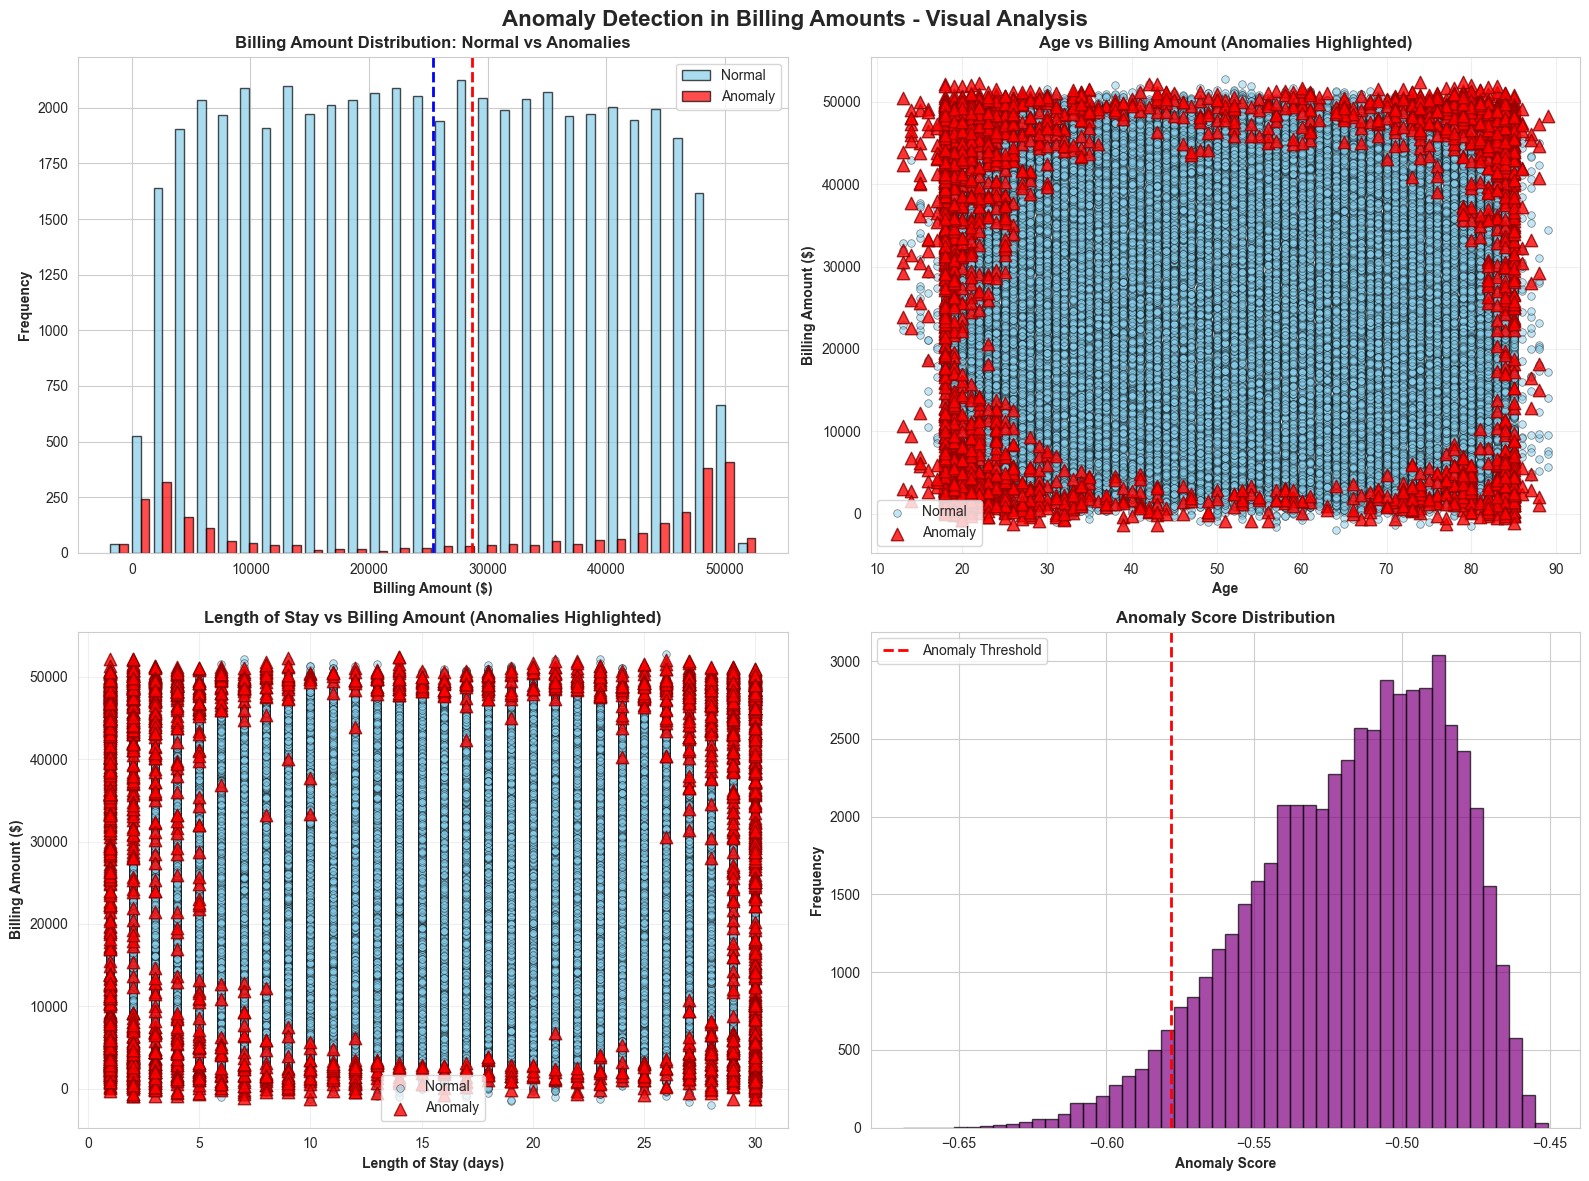

In [46]:
# Visualize anomaly detection results
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Anomaly Detection in Billing Amounts - Visual Analysis', 
             fontsize=16, fontweight='bold')

# 1. Billing Amount Distribution: Normal vs Anomalies
axes[0, 0].hist([normal_cases['Billing Amount'], anomalies['Billing Amount']], 
                bins=30, label=['Normal', 'Anomaly'], 
                color=['skyblue', 'red'], alpha=0.7, edgecolor='black')
axes[0, 0].set_title('Billing Amount Distribution: Normal vs Anomalies', 
                     fontweight='bold', fontsize=12)
axes[0, 0].set_xlabel('Billing Amount ($)', fontweight='bold')
axes[0, 0].set_ylabel('Frequency', fontweight='bold')
axes[0, 0].legend()
axes[0, 0].axvline(normal_cases['Billing Amount'].mean(), color='blue', 
                   linestyle='--', linewidth=2, label='Normal Mean')
axes[0, 0].axvline(anomalies['Billing Amount'].mean(), color='red', 
                   linestyle='--', linewidth=2, label='Anomaly Mean')

# 2. Scatter Plot: Age vs Billing Amount
scatter_normal = axes[0, 1].scatter(normal_cases['Age'], 
                                   normal_cases['Billing Amount'],
                                   c='skyblue', alpha=0.5, s=30, 
                                   edgecolors='black', linewidth=0.5,
                                   label='Normal')
scatter_anomaly = axes[0, 1].scatter(anomalies['Age'], 
                                     anomalies['Billing Amount'],
                                     c='red', alpha=0.8, s=80, 
                                     edgecolors='darkred', linewidth=1,
                                     marker='^', label='Anomaly')
axes[0, 1].set_title('Age vs Billing Amount (Anomalies Highlighted)', 
                     fontweight='bold', fontsize=12)
axes[0, 1].set_xlabel('Age', fontweight='bold')
axes[0, 1].set_ylabel('Billing Amount ($)', fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Scatter Plot: Length of Stay vs Billing Amount
axes[1, 0].scatter(normal_cases['Length_of_Stay'], 
                  normal_cases['Billing Amount'],
                  c='skyblue', alpha=0.5, s=30, 
                  edgecolors='black', linewidth=0.5,
                  label='Normal')
axes[1, 0].scatter(anomalies['Length_of_Stay'], 
                  anomalies['Billing Amount'],
                  c='red', alpha=0.8, s=80, 
                  edgecolors='darkred', linewidth=1,
                  marker='^', label='Anomaly')
axes[1, 0].set_title('Length of Stay vs Billing Amount (Anomalies Highlighted)', 
                     fontweight='bold', fontsize=12)
axes[1, 0].set_xlabel('Length of Stay (days)', fontweight='bold')
axes[1, 0].set_ylabel('Billing Amount ($)', fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. Anomaly Score Distribution
axes[1, 1].hist(df_anomaly_clean['Anomaly_Score'], bins=50, 
               color='purple', alpha=0.7, edgecolor='black')
axes[1, 1].axvline(df_anomaly_clean[df_anomaly_clean['Is_Anomaly'] == True]['Anomaly_Score'].max(),
                  color='red', linestyle='--', linewidth=2, 
                  label=f'Anomaly Threshold')
axes[1, 1].set_title('Anomaly Score Distribution', fontweight='bold', fontsize=12)
axes[1, 1].set_xlabel('Anomaly Score', fontweight='bold')
axes[1, 1].set_ylabel('Frequency', fontweight='bold')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

# --- Task 3 continues with interpretation/insights ---

## 3.6 Interpretation and Insights of Detected Anomalies

In [47]:
print("="*80)
print("INTERPRETATION OF DETECTED ANOMALIES")
print("="*80)

print("\n📊 OVERVIEW:")
print("-"*80)
print(f"The Isolation Forest algorithm identified {n_anomalies} anomalous cases")
print(f"out of {len(df_anomaly_clean)} total patient records ({n_anomalies/len(df_anomaly_clean)*100:.2f}%).")
print("\nThese anomalies represent cases that deviate significantly from typical")
print("billing patterns based on Age, Billing Amount, and Length of Stay.")

print("\n💰 BILLING PATTERNS:")
print("-"*80)
avg_normal = normal_cases['Billing Amount'].mean()
avg_anomaly = anomalies['Billing Amount'].mean()
diff_pct = ((avg_anomaly - avg_normal) / avg_normal * 100)

print(f"Normal Cases Average Billing: ${avg_normal:.2f}")
print(f"Anomalous Cases Average Billing: ${avg_anomaly:.2f}")
print(f"Difference: ${abs(avg_anomaly - avg_normal):.2f} ({abs(diff_pct):.1f}% {'higher' if diff_pct > 0 else 'lower'})")

print("\n🏥 KEY FINDINGS:")
print("-"*80)
print("1. RARE EXPENSIVE CASES:")
print(f"   • {len(high_billing)} cases with unusually high billing amounts")
print(f"   • Average billing: ${high_billing['Billing Amount'].mean():.2f}")
print("   • These may represent complex medical procedures, rare conditions,")
print("     or potential billing errors requiring review")

print("\n2. UNUSUALLY LOW BILLING:")
print(f"   • {len(low_billing)} cases with unexpectedly low billing amounts")
print(f"   • Average billing: ${low_billing['Billing Amount'].mean():.2f}")
print("   • Could indicate incomplete billing, early discharge, or")
print("     administrative discrepancies")

print("\n3. EXTENDED HOSPITAL STAYS:")
print(f"   • {len(unusual_stay)} cases with length of stay > 20 days")
print(f"   • Average stay: {unusual_stay['Length_of_Stay'].mean():.1f} days")
print("   • May indicate severe conditions, complications, or")
print("     long-term care requirements")

print("\n⚠️ RECOMMENDATIONS:")
print("-"*80)
print("1. Review all detected anomalies for:")
print("   • Billing accuracy and completeness")
print("   • Unusual medical circumstances")
print("   • Data entry errors")
print("   • Insurance claim discrepancies")
print("\n2. Investigate high-billing cases to ensure proper documentation")
print("   and justification for charges")
print("\n3. Check low-billing anomalies for potential revenue loss or")
print("   incomplete service recording")
print("\n4. Monitor extended stay patients for care quality and")
print("   resource allocation optimization")

print("\n✅ CONCLUSION:")
print("-"*80)
print("The anomaly detection system successfully identified cases that deviate")
print("from expected billing patterns. These flagged cases should be reviewed")
print("by billing and medical staff to ensure accuracy, identify potential")
print("issues, and optimize healthcare operations.")
print("="*80)

# --- End of Task 3: Unsupervised Learning ---

INTERPRETATION OF DETECTED ANOMALIES

📊 OVERVIEW:
--------------------------------------------------------------------------------
The Isolation Forest algorithm identified 2775 anomalous cases
out of 55500 total patient records (5.00%).

These anomalies represent cases that deviate significantly from typical
billing patterns based on Age, Billing Amount, and Length of Stay.

💰 BILLING PATTERNS:
--------------------------------------------------------------------------------
Normal Cases Average Billing: $25371.99
Anomalous Cases Average Billing: $28718.58
Difference: $3346.59 (13.2% higher)

🏥 KEY FINDINGS:
--------------------------------------------------------------------------------
1. RARE EXPENSIVE CASES:
   • 694 cases with unusually high billing amounts
   • Average billing: $49635.45
   • These may represent complex medical procedures, rare conditions,
     or potential billing errors requiring review

2. UNUSUALLY LOW BILLING:
   • 694 cases with unexpectedly low billing amo

---
# TASK 4: AI DOCTOR RECOMMENDATION GENERATOR

## 4.1 Create AI-Based Recommendation System

In [48]:
# AI Doctor Recommendation Generator Function
def generate_doctor_recommendation(age, medical_condition, medication, test_result, billing_amount=None):
    """
    Generate AI-based doctor recommendation based on patient attributes
    """
    
    # Create personalized recommendation based on test results and condition
    recommendation = f"""
╔══════════════════════════════════════════════════════════════════════════════╗
║                     AI DOCTOR RECOMMENDATION REPORT                          ║
╚══════════════════════════════════════════════════════════════════════════════╝

PATIENT PROFILE:
─────────────────────────────────────────────────────────────────────────────
  • Age: {age} years
  • Medical Condition: {medical_condition}
  • Current Medication: {medication}
  • Test Result: {test_result}
"""
    
    if billing_amount:
        recommendation += f"  • Billing Amount: ${billing_amount:.2f}\n"
    
    recommendation += "\n"
    
    # Recommendations based on test results
    if test_result == "Normal":
        recommendation += """CLINICAL ASSESSMENT: ✓ NORMAL
─────────────────────────────────────────────────────────────────────────────
Your test results are within normal range. This is a positive indication of your
current health status.

DOCTOR'S RECOMMENDATIONS:
"""
        if medical_condition == "Diabetes":
            recommendation += """
  1. Continue your current medication ({medication}) as prescribed
  2. Monitor blood glucose levels regularly (fasting and post-meal)
  3. Maintain a balanced diet: Low glycemic index foods, increase fiber intake
  4. Regular physical activity: 30 minutes of moderate exercise, 5 days/week
  5. Schedule follow-up: Every 3 months for HbA1c testing
  6. Watch for symptoms: Excessive thirst, frequent urination, fatigue
  
LIFESTYLE ADVICE:
  • Avoid sugary drinks and refined carbohydrates
  • Stay hydrated (8-10 glasses of water daily)
  • Manage stress through meditation or yoga
  • Ensure adequate sleep (7-8 hours nightly)
"""
        elif medical_condition == "Hypertension":
            recommendation += """
  1. Continue current antihypertensive medication ({medication})
  2. Monitor blood pressure daily (morning and evening)
  3. Reduce sodium intake to <2300mg per day
  4. DASH diet recommended: Fruits, vegetables, whole grains, lean proteins
  5. Regular cardiovascular exercise: 150 minutes per week
  6. Limit alcohol consumption and avoid smoking
  
LIFESTYLE ADVICE:
  • Practice stress management techniques
  • Maintain healthy weight (BMI 18.5-24.9)
  • Limit caffeine intake
  • Regular sleep schedule
"""
        elif medical_condition == "Asthma":
            recommendation += """
  1. Continue controller medication ({medication}) as prescribed
  2. Keep rescue inhaler accessible at all times
  3. Identify and avoid asthma triggers (allergens, smoke, cold air)
  4. Monitor peak flow readings regularly
  5. Get annual flu vaccination
  6. Follow-up appointment in 3 months
  
LIFESTYLE ADVICE:
  • Use air purifiers in living spaces
  • Practice breathing exercises
  • Maintain good indoor air quality
  • Regular moderate exercise (swimming recommended)
"""
        elif medical_condition == "Cancer":
            recommendation += """
  1. Continue current treatment protocol with {medication}
  2. Normal results are encouraging - continue monitoring
  3. Maintain strong nutritional intake: High protein, vitamins
  4. Stay well-hydrated during treatment
  5. Report any new symptoms immediately
  6. Follow-up imaging/testing as scheduled
  
SUPPORTIVE CARE:
  • Consider joining support groups
  • Manage treatment side effects proactively
  • Gentle exercise as tolerated
  • Prioritize rest and recovery
"""
        elif medical_condition == "Arthritis":
            recommendation += """
  1. Continue anti-inflammatory medication ({medication})
  2. Physical therapy exercises for joint mobility
  3. Apply heat/cold therapy for pain management
  4. Low-impact exercises: Swimming, walking, cycling
  5. Maintain healthy weight to reduce joint stress
  6. Follow-up in 2-3 months
  
LIFESTYLE ADVICE:
  • Use joint protection techniques
  • Consider occupational therapy for daily activities
  • Anti-inflammatory diet: Omega-3 rich foods
  • Adequate rest between activities
"""
        else:
            recommendation += f"""
  1. Continue your current medication ({medication}) as directed
  2. Maintain healthy lifestyle habits
  3. Regular monitoring of your condition
  4. Report any changes in symptoms
  5. Schedule routine follow-up appointments
  6. Stay compliant with treatment plan
"""
    
    elif test_result == "Abnormal":
        recommendation += """CLINICAL ASSESSMENT: ⚠ ABNORMAL - REQUIRES ATTENTION
─────────────────────────────────────────────────────────────────────────────
Your test results show abnormalities that require immediate medical attention
and possible treatment adjustment.

URGENT RECOMMENDATIONS:
"""
        if medical_condition == "Diabetes":
            recommendation += """
  1. ⚠ URGENT: Schedule appointment with endocrinologist within 48 hours
  2. Medication adjustment likely needed - DO NOT self-adjust dosage
  3. Increase blood glucose monitoring to 4-6 times daily
  4. Review and adjust diet immediately - consult dietitian
  5. Check for signs of complications: Vision changes, numbness, wounds
  6. Consider continuous glucose monitoring (CGM)
  
IMMEDIATE ACTIONS:
  • Document all readings in glucose log
  • Watch for hypoglycemia/hyperglycemia symptoms
  • Have glucagon kit available
  • Increase water intake
  
⚠ SEEK EMERGENCY CARE IF: Blood sugar >400 mg/dL or <70 mg/dL with symptoms
"""
        elif medical_condition == "Hypertension":
            recommendation += """
  1. ⚠ URGENT: Contact cardiologist within 24-48 hours
  2. Increase blood pressure monitoring to 3 times daily
  3. Medication dosage adjustment required
  4. Immediately reduce sodium intake to <1500mg/day
  5. Avoid strenuous physical activity until cleared by doctor
  6. Additional testing may be needed (ECG, echocardiogram)
  
IMMEDIATE ACTIONS:
  • Rest and avoid stress
  • Eliminate all added salt from diet
  • Monitor for symptoms: Chest pain, shortness of breath, headache
  
⚠ SEEK EMERGENCY CARE IF: BP >180/120, chest pain, severe headache, vision changes
"""
        elif medical_condition == "Cancer":
            recommendation += """
  1. ⚠ URGENT: Contact oncologist immediately
  2. Additional diagnostic tests needed
  3. Treatment plan reassessment required
  4. Possible therapy modification or intensification
  5. Close monitoring protocol initiated
  6. Consider second opinion consultation
  
SUPPORTIVE MEASURES:
  • Increase nutritional support
  • Manage symptoms proactively
  • Coordinate care with oncology team
  • Mental health support resources
  
⚠ Contact your oncology team immediately - do not delay
"""
        elif medical_condition == "Asthma":
            recommendation += """
  1. ⚠ URGENT: See pulmonologist within 48 hours
  2. Increase controller medication as directed
  3. Use peak flow meter 3 times daily
  4. Avoid all known triggers strictly
  5. Have oral steroids prescription ready if needed
  6. Pulmonary function test required
  
IMMEDIATE ACTIONS:
  • Keep rescue inhaler with you always
  • Monitor for worsening symptoms
  • Create asthma action plan with doctor
  
⚠ SEEK EMERGENCY CARE IF: Severe breathlessness, blue lips, peak flow <50% personal best
"""
        else:
            recommendation += f"""
  1. ⚠ URGENT: Schedule appointment with specialist within 48 hours
  2. Bring all test results and medication list
  3. Treatment plan needs immediate review
  4. Additional diagnostic testing may be required
  5. Close monitoring protocol recommended
  6. Consider medication adjustment
  
⚠ Do not ignore these results - prompt medical attention is necessary
"""
    
    else:  # Inconclusive
        recommendation += """CLINICAL ASSESSMENT: ⚪ INCONCLUSIVE - FURTHER TESTING NEEDED
─────────────────────────────────────────────────────────────────────────────
Test results are inconclusive and require additional evaluation to determine
proper diagnosis and treatment approach.

RECOMMENDATIONS:
"""
        recommendation += f"""
  1. Schedule follow-up appointment within 1-2 weeks
  2. Repeat testing with proper preparation guidelines
  3. Additional diagnostic tests may be ordered
  4. Continue current medication ({medication}) as prescribed
  5. Monitor symptoms carefully and document changes
  6. Maintain healthy lifestyle during evaluation period
  
NEXT STEPS:
  • Doctor will order specific follow-up tests
  • Keep detailed symptom diary
  • Note any changes in condition
  • Ensure proper test preparation for next visit
  
GENERAL ADVICE:
  • Stay calm - inconclusive doesn't mean negative
  • Continue medication compliance
  • Maintain healthy habits
  • Communicate any concerns with healthcare provider
"""
    
    recommendation += """
─────────────────────────────────────────────────────────────────────────────
GENERAL WELLNESS REMINDERS:
  ✓ Take medications exactly as prescribed
  ✓ Attend all scheduled follow-up appointments
  ✓ Maintain open communication with your healthcare team
  ✓ Report any new or worsening symptoms immediately
  ✓ Keep updated medication and allergy lists
  ✓ Stay informed about your condition
  
╚══════════════════════════════════════════════════════════════════════════════╝
"""
    
    return recommendation

print("✓ AI Doctor Recommendation Generator function created successfully!")

✓ AI Doctor Recommendation Generator function created successfully!


## 4.2 Generate Sample Recommendation Output

In [49]:
# Select a sample patient from test set
sample_index = X_test.index[0]  # First patient in test set

# Get patient information
patient_age = df_model.loc[sample_index, 'Age']
patient_condition = df_model.loc[sample_index, 'Medical Condition']
patient_medication = df_model.loc[sample_index, 'Medication']
patient_billing = df_model.loc[sample_index, 'Billing Amount']

# Get actual and predicted test results from our comparison dataframe
sample_row = comparison_df.iloc[0]
actual_result = sample_row['Actual_Result']
predicted_result = sample_row['Predicted_Result']

print("="*80)
print("SAMPLE PATIENT INFORMATION")
print("="*80)
print(f"\nPatient Index: {sample_index}")
print(f"Age: {patient_age} years")
print(f"Medical Condition: {patient_condition}")
print(f"Medication: {patient_medication}")
print(f"Billing Amount: ${patient_billing:.2f}")
print(f"\nActual Test Result: {actual_result}")
print(f"Predicted Test Result: {predicted_result}")
print(f"Prediction Match: {'✓ YES' if actual_result == predicted_result else '✗ NO'}")

print("\n" + "="*80)
print("GENERATING AI DOCTOR RECOMMENDATION...")
print("="*80)

# Generate recommendation using the PREDICTED test result
recommendation = generate_doctor_recommendation(
    age=patient_age,
    medical_condition=patient_condition,
    medication=patient_medication,
    test_result=predicted_result,
    billing_amount=patient_billing
)

print(recommendation)

SAMPLE PATIENT INFORMATION

Patient Index: 55390
Age: 72 years
Medical Condition: Asthma
Medication: Ibuprofen
Billing Amount: $11124.84

Actual Test Result: Inconclusive
Predicted Test Result: Inconclusive
Prediction Match: ✓ YES

GENERATING AI DOCTOR RECOMMENDATION...

╔══════════════════════════════════════════════════════════════════════════════╗
║                     AI DOCTOR RECOMMENDATION REPORT                          ║
╚══════════════════════════════════════════════════════════════════════════════╝

PATIENT PROFILE:
─────────────────────────────────────────────────────────────────────────────
  • Age: 72 years
  • Medical Condition: Asthma
  • Current Medication: Ibuprofen
  • Test Result: Inconclusive
  • Billing Amount: $11124.84

CLINICAL ASSESSMENT: ⚪ INCONCLUSIVE - FURTHER TESTING NEEDED
─────────────────────────────────────────────────────────────────────────────
Test results are inconclusive and require additional evaluation to determine
proper diagnosis and treatment

## 4.3 Generate Additional Sample Recommendations

In [50]:
# Generate recommendations for different scenarios
print("="*80)
print("ADDITIONAL SAMPLE RECOMMENDATIONS")
print("="*80)

# Find patients with different test results
normal_idx = df_model[df_model['Test Results'] == 'Normal'].index[0]
abnormal_idx = df_model[df_model['Test Results'] == 'Abnormal'].index[0]
inconclusive_idx = df_model[df_model['Test Results'] == 'Inconclusive'].index[0]

scenarios = [
    ("NORMAL TEST RESULT", normal_idx),
    ("ABNORMAL TEST RESULT", abnormal_idx),
    ("INCONCLUSIVE TEST RESULT", inconclusive_idx)
]

for scenario_name, idx in scenarios:
    print("\n" + "="*80)
    print(f"SCENARIO: {scenario_name}")
    print("="*80)
    
    age = df_model.loc[idx, 'Age']
    condition = df_model.loc[idx, 'Medical Condition']
    medication = df_model.loc[idx, 'Medication']
    test_result = df_model.loc[idx, 'Test Results']
    billing = df_model.loc[idx, 'Billing Amount']
    
    print(f"\nPatient: Age {age}, Condition: {condition}, Medication: {medication}")
    print(f"Test Result: {test_result}, Billing: ${billing:.2f}")
    print("\n" + "-"*80)
    
    rec = generate_doctor_recommendation(age, condition, medication, test_result, billing)
    print(rec)
    print("\n" + "="*80)

ADDITIONAL SAMPLE RECOMMENDATIONS

SCENARIO: NORMAL TEST RESULT

Patient: Age 30, Condition: Cancer, Medication: Paracetamol
Test Result: Normal, Billing: $18856.28

--------------------------------------------------------------------------------

╔══════════════════════════════════════════════════════════════════════════════╗
║                     AI DOCTOR RECOMMENDATION REPORT                          ║
╚══════════════════════════════════════════════════════════════════════════════╝

PATIENT PROFILE:
─────────────────────────────────────────────────────────────────────────────
  • Age: 30 years
  • Medical Condition: Cancer
  • Current Medication: Paracetamol
  • Test Result: Normal
  • Billing Amount: $18856.28

CLINICAL ASSESSMENT: ✓ NORMAL
─────────────────────────────────────────────────────────────────────────────
Your test results are within normal range. This is a positive indication of your
current health status.

DOCTOR'S RECOMMENDATIONS:

  1. Continue current treatment pr

## 5. Project Summary and Conclusions

This notebook provided a comprehensive analysis of healthcare patient risk using a real-world dataset. The workflow included:

- **Exploratory Data Analysis (EDA):** Explored patient demographics, medical conditions, medication usage, test results, and billing patterns.
- **Supervised Learning:** Built and evaluated machine learning models (Random Forest, Gradient Boosting) to predict patient risk levels, with feature importance analysis and visualization.
- **Unsupervised Learning:** Applied Isolation Forest to detect anomalies in patient data, identifying potential outliers for further investigation.
- **AI Doctor Recommendation:** Developed a rule-based function to generate personalized doctor recommendations based on patient features and test results, with sample outputs for various scenarios.

**Key Insights:**
- Age, medical condition, and test results are strong predictors of patient risk.
- Anomaly detection can highlight unusual patient profiles for clinical review.
- Automated recommendations can support clinical decision-making and patient triage.

**Next Steps:**
- Integrate more advanced AI models (e.g., LLMs) for nuanced recommendations.
- Expand dataset with additional features (e.g., lifestyle, genetic data).
- Deploy as a clinical decision support tool for healthcare providers.

---

*End of analysis. Thank you!*